# 6.1 선형회귀모형 및 다중회귀모형 

Boston house data를 불러와보자. 

In [49]:
from sklearn import datasets
import pandas as pd

In [52]:
data =  datasets.load_boston()

In [53]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [54]:
data_x = data.data
data_y = data.target

In [55]:
data_x = pd.DataFrame(data_x)
data_y = pd.DataFrame(data_y)

data_x.columns = data.feature_names

In [56]:
data_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Data의 feature들에 대한 설명은 다음과 같다.

CRIM : 자치별 1인당 범죄율
    
ZN : 25,000 평방비트를 초과하는 거주지역의 비율
    
INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
    
CHAS : 찰스강에 대한 더미변수(강의 경계에 위치하면 1 아니면 0)
    
NOX : 10ppm당 농축 일산화질소
    
RM : 주택 1가구당 평균 방의 개수
    
AGE : 1940년 이전에 건축된 소유주택의 비율
    
DIS : 5개의 보스턴 직업센터까지의 접근성 지수

RAD : 방사형 도로까지의 접근성 지수

TAX : 10,000 달러 당 재산 비율

PTRATO : 자치별 학생/교사 비율

B : 흑인 비율에 관련된 지표

LSTAT : 모집단 하위계층의 비율

MEDV : 본인 소유의 주택가격 

In [10]:
data_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Data_y 는 집의 가격에 대한 데이터이다. 

1. 데이터에서 결측값이 없는지 확인해보자. 

In [11]:
data_x.isnull().sum(1).sum()

0

2. 데이터에 대한 기초통계량들을 확인해보자. 

In [12]:
data_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


3. 선형회귀모형 적합

CRIM 데이터를 바탕으로 집값을 예측하는 회귀모형을 구해보자.  

In [13]:
data_x1  = data_x["CRIM"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 

3-1 학습데이터와 훈련데이터를 분리해보자. 

In [20]:
import numpy as np

In [85]:
train_x,test_x,train_y,test_y = train_test_split(data_x1,data_y,random_state=15)

3-2 MinMax를 통해서 데이터에 대한 정규화를 진행해보자. 

In [89]:
train_x.head(10)

163    1.51902
228    0.29819
84     0.05059
189    0.08370
322    0.35114
148    2.33099
24     0.75026
142    3.32105
38     0.17505
192    0.08664
Name: CRIM, dtype: float64

#### MinMax 개념


$x_{i}$ : 주어진 데이터

$z_{i} = {x_{i}-min_{i}(x_{i}) \over max_{i}(x_{i})-min_{i}(x_{i})}$

In [96]:
minmax = MinMaxScaler()
minmax.fit(train_x.values.reshape(-1,1))

train_x_minmax = minmax.transform(train_x.values.reshape(-1,1))
test_x_minmax = minmax.transform(test_x.values.reshape(-1,1))

<주의> 

위에서 minmax.fit(train_x)를 하게 되면 오류가 나오게 된다. 

3-3 선형회귀모형 적합 

In [97]:
model = LinearRegression()
model.fit(train_x_minmax,train_y)

LinearRegression()

3-4 시각화 

In [98]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'House_value')

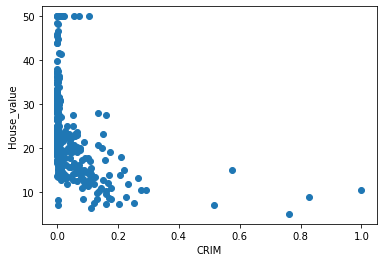

In [99]:
plt.scatter(train_x_minmax,train_y)
plt.xlabel("CRIM")
plt.ylabel('House_value')

In [101]:
model.coef_

array([[-33.95743527]])

In [102]:
model.intercept_

array([24.03153824])

따라서 생성한 모형은 다음과 같다. 

$y_{i} = 24.03 - 33.95x_{i}$

In [103]:
x = [i*0.1 for i in range(0,10)]

In [106]:
y = [24.03 -33.95*x[i] for i in range(0,10)]

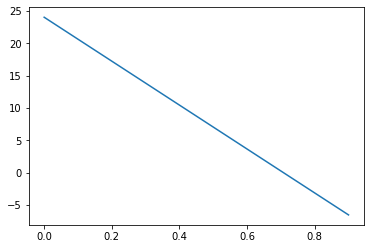

In [107]:
plt.plot(x,y)

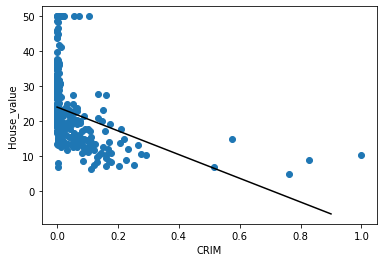

In [108]:
plt.scatter(train_x_minmax,train_y)
plt.xlabel("CRIM")
plt.ylabel('House_value')
plt.plot(x,y,color ="black")

3-5 성능평가 

model.score 는 결정계수 $R^{2}={SSR\over SST}$를 구하는 함수를 의미한다. 

In [109]:
model.score(train_x_minmax,train_y)

0.13431173202974056

In [110]:
model.score(test_x_minmax,test_y)

0.19318557021137106

4. 이상치 제거를 통한 모형성능 향상 

4.1 이상치 판별 

array([[<AxesSubplot:title={'center':'CRIM'}>]], dtype=object)

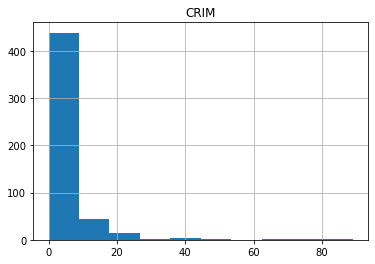

In [111]:
data_x[["CRIM"]].hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

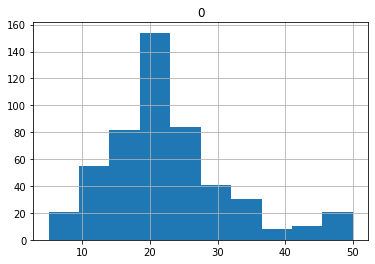

In [112]:
data_y.hist()

CRIM에서 오른쪽 꼬리들이 이상치로 보이므로, 이를 제거해보자. 

In [113]:
Q1 = data_x["CRIM"].quantile(0.25)
Q3 = data_x["CRIM"].quantile(0.75)

Q_value = Q3-Q1

In [114]:
Q_value

3.5950375

In [115]:
data_crim_y = data_y[(data_x["CRIM"] <= Q3 + 1.5*Q_value) & (data_x["CRIM"] >Q1 - 1.5*Q_value) ]
data_crim_x = data_x[(data_x["CRIM"] <=Q3 + 1.5*Q_value) & (data_x["CRIM"] > Q1 - 1.5*Q_value) ]

<AxesSubplot:>

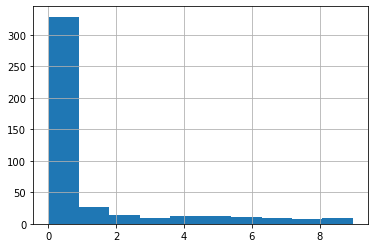

In [116]:
data_crim_x["CRIM"].hist()

이상치를 제거한 데이터를 바탕으로 선형회귀모형을 다시 적합해보자. 

4-2 훈련데이터와 테스트데이터를 분리해보자. 

In [117]:
train_x,test_x,train_y,test_y = train_test_split(data_crim_x,data_crim_y,random_state=15)

4-3 정규화

In [118]:
minmax = MinMaxScaler()
minmax.fit(train_x.values.reshape(-1,1))

train_x_minmax = minmax.transform(train_x["CRIM"].values.reshape(-1,1))
test_x_minmax = minmax.transform(test_x["CRIM"].values.reshape(-1,1))

4-4 선형회귀모형 훈련

In [119]:
model = LinearRegression()
model.fit(train_x_minmax,train_y)

LinearRegression()

Text(0, 0.5, 'House_value')

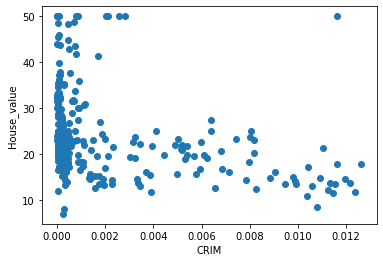

In [120]:
plt.scatter(train_x_minmax,train_y)
plt.xlabel("CRIM")
plt.ylabel('House_value')

In [121]:
model.coef_

array([[-839.02673339]])

In [122]:
model.intercept_

array([25.16488565])

따라서, 학습된 모형은 $y_{i} = 25.16 -839x_{i}$

In [126]:
x = [i*0.001 for i in range(0,16)]
y = [25.16 -839*x[i] for i in range(0,16)]

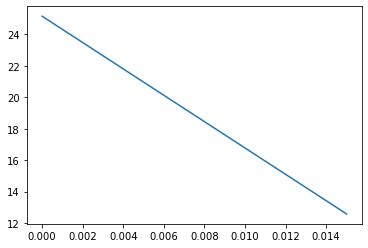

In [127]:
plt.plot(x,y)

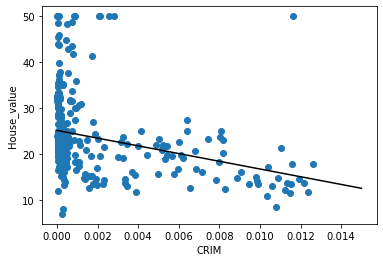

In [128]:
plt.scatter(train_x_minmax,train_y)
plt.xlabel("CRIM")
plt.ylabel('House_value')
plt.plot(x,y,color ="black")

In [129]:
model.score(train_x_minmax,train_y)

0.09127160251917155

결정계수 기준으로 모형의 성능이 안좋아졌음을 확인할 수 있다. 

5. 다중회귀모형 

$f({x_{i}})=\hat{\beta}_{0}+\hat{\beta}_{1}x_{i1}+\hat{\beta}_{2}x_{i2}+...+\hat{\beta}_{p}x_{ip}$ 인 모형을 구한다.

In [131]:
data_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [135]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,random_state=15,test_size = 0.3)

In [136]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

In [137]:
model = LinearRegression()
model.fit(train_x_minmax,train_y)

LinearRegression()

In [138]:
model.score(train_x_minmax,train_y)

0.7616006638738497

In [139]:
model.score(test_x_minmax,test_y)

0.6745262607211453

# 6.2 로지스틱 회귀모형 

이진분류(classification)을 하는 모형을 $P(Y=1|X)$에 대해서 생성하자. 

즉, Data $X$가 주어져 있을때 $X$에 대한 Y=1 (class가 1인 경우) 확률을 맞추는 모형을 생성한다.

　
 
기존의 다중회귀모형을 통해서 $P(Y=1|X)$를 예측하는 모형을 만드는 경우, 다중회귀모형의 예측값은 0과1사이 값을 갖는 것이 아니라, $-\infty , \infty$ 사이의 값을 갖기 때문에 제대로된 예측이 불가능하다.


따라서, $P(Y=1|X) = {exp(\hat{\beta}_{0}+\hat{\beta}_{1}x_{1i} +...+\hat{\beta}_{p}x_{pi}) \over 1+exp(\hat{\beta}_{0}+\hat{\beta}_{1}x_{1i} +...+\hat{\beta}_{p}x_{pi})}$ 을 만족하는 $\hat{\beta}_{0},...,\hat{\beta}_{p}$들을 구한다. 

$ln{P(Y=1|X)\over1-P(Y=1|X)}$ = $\hat{\beta}_{0}+...+\hat{\beta}_{p}$

1. 데이터 불러오기

분류를 시행하기 위해서, Breast cancer Data를 불러오자. 

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
Data_X = data.data
Data_Y = data.target

In [5]:
import pandas as pd
Data_X=pd.DataFrame(Data_X)
Data_X.columns = data.feature_names

In [6]:
Data_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Target 에서 0 은 유방암 음성   1은 유방암 양성 을 의미한다. 

In [7]:
Data_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

2. 훈련데이터와 테스트데이터를 나누자. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
train_x,test_x,train_y,test_y = train_test_split(Data_X,Data_Y,random_state=15)

array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>,
        <AxesSubplot:title={'center':'mean perimeter'}>,
        <AxesSubplot:title={'center':'mean area'}>,
        <AxesSubplot:title={'center':'mean smoothness'}>],
       [<AxesSubplot:title={'center':'mean compactness'}>,
        <AxesSubplot:title={'center':'mean concavity'}>,
        <AxesSubplot:title={'center':'mean concave points'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>,
        <AxesSubplot:title={'center':'mean fractal dimension'}>],
       [<AxesSubplot:title={'center':'radius error'}>,
        <AxesSubplot:title={'center':'texture error'}>,
        <AxesSubplot:title={'center':'perimeter error'}>,
        <AxesSubplot:title={'center':'area error'}>,
        <AxesSubplot:title={'center':'smoothness error'}>],
       [<AxesSubplot:title={'center':'compactness error'}>,
        <AxesSubplot:title={'center':'concavity error'}>,
        <AxesSubplot:ti

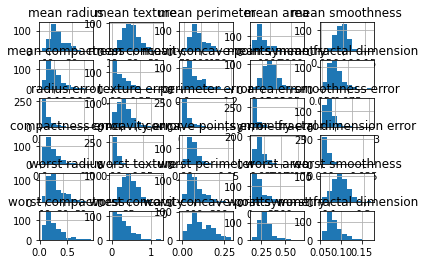

In [9]:
train_x.hist()

이상치가 도드라 지는 데이터 feature가 없는 것으로 보이므로 
이대로 데이터 정규화를 진행하여 모델을 학습시켜보자. 

3. 정규화

In [10]:
minmax = MinMaxScaler()
minmax.fit(train_x)
train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

4. 모형학습 

In [11]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [12]:
model.fit(train_x_minmax,train_y)

LogisticRegression()

train data에 대한 예측 결과는 다음과 같다. 

model.predict(predict에 사용할 독립변수 데이터(feature) )

In [33]:
pred = model.predict(train_x_minmax)
pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

5. 모형평가

5.1 Accuracy $= { 맞춘갯수\over 데이터 갯수}$  을 기준으로 모형을 평가해보자. 

(1) Train data에 대한 Accuracy

In [15]:
model.score(train_x_minmax,train_y)

0.9788732394366197

(2) Test data에 대한 Accuracy

In [16]:
model.score(test_x_minmax,test_y)

0.951048951048951

** test data에 대한 accuracy for 문 이용

5.2 혼돈행렬 이용

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
train_pred = model.predict(train_x_minmax)
test_pred = model.predict(test_x_minmax)

In [19]:
confusion_train_matrix = confusion_matrix(train_y,train_pred)

In [20]:
confusion_train_matrix

array([[150,   9],
       [  0, 267]], dtype=int64)

### 문제6.1

위에서 학습한 로지스틱 회귀모형에서 정밀도(precision),재현율(recall)를 구해라.

In [30]:
from sklearn.metrics import classification_report

In [31]:
value_train = classification_report(train_y,train_pred)

In [32]:
print(value_train)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       159
           1       0.97      1.00      0.98       267

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426



### 문제6.2

Test data에 대한 precision, recall, f1-score 값을 패키지를 이용해서 구하여라.

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

test_pred = model.predict(test_x_minmax)

print(precision_score(test_y, test_pred))
print(recall_score(test_y, test_pred))
print(f1_score(test_y, test_pred))

0.946236559139785
0.9777777777777777
0.9617486338797814


6. ROC curve를 이용한 모형평가

In [33]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics

Test 데이터에 대한 AUC와 ROC-curve를 그려보자. 

In [42]:
FPR,TPR,threshold = roc_curve(test_y,model.decision_function(test_x_minmax))

6.1 ROC 곡선

In [40]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'TPR')

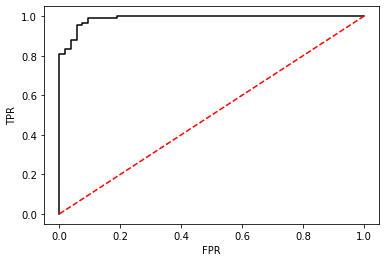

In [43]:
plt.plot(FPR,TPR,'black')
plt.plot([0,1],[0,1],"r--")
plt.xlabel("FPR")
plt.ylabel("TPR")

6.2 AUC

AUC란 ROC Curve에서의 밑면적을 의미하며, 1에 가까울 수록 좋은 성능을 가졌다고 판단한다. 

In [44]:
model_auc = metrics.roc_auc_score(test_y,model.decision_function(test_x_minmax))

In [46]:
model_auc

0.9884696016771489

# 6.3 릿지회귀모형 

앞에서 사용하였던 Boston house 데이터에서 CRIM feature를 바탕으로 house value를 릿지회귀모형을 바탕으로 예측해보자. Ridge regression

현재 데이터는 아래와 같다. 

In [50]:
data =  datasets.load_boston()

In [57]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,random_state=15)

In [58]:
train_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32
228,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
189,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
133,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46


In [59]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

In [60]:
from sklearn.linear_model import Ridge

In [61]:
ridge_model = Ridge()

모형을 학습해보자. 

In [62]:
ridge_model.fit(train_x_minmax,train_y)

Ridge()

In [63]:
ridge_model.score(train_x_minmax,train_y)

0.7505728290202236

In [64]:
ridge_model.score(test_x_minmax,test_y)

0.6920180622753547

6.1.5 에서 만들었던 다중회귀모형의 성능은 다음과 같다.

train data에 대한 $R^{2}$ = 0.755

test data에 대한 $R^{2}$ = 0.685


위에서의 릿지 회귀모형의 성능은 train data 에서는 감소하였지만, test data 에서는 증가함을 알 수 있었다. 

### 문제6.5

$\hat{f}(x_{i})=\hat{\beta}_{0}+\hat{\beta}_{1}x_{i1}+...+\hat{\beta}_{p}x_{ip}$ 모형을 학습하였을때, 이 모형에 대한 성능을 다음과 같은 손실함수로 평가할 수 있다. 
　

$MSE={1\over n}\sum_{i=1}^{n}(y_{i}-\hat{f}(x_{i}))^{2}$ 


이를 참고하여, 위에서의 학습한 릿지모형의 성능을 test data를 이용해서 평가해라.  

In [65]:
from sklearn.metrics import mean_squared_error

test_pred = ridge_model.predict(test_x_minmax)
print(mean_squared_error(test_y, test_pred))

25.755507682832306
